In [1]:
import pandas as pd

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/data-science-practice/module3/exercise/module3_exercise_test.csv


In [3]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

### Data analysis

In [5]:
import matplotlib.pyplot as plt

In [7]:
df_train.head()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240


In [13]:
df_train.shape

(1168, 17)

**Insight:**


The dataset contains 1168 rows and 17 columns.

In [11]:
print("Summary info:")
df_train.info()

Summary info:
<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memor

In [12]:
df_train[df_train.isnull().any(axis=1)]

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1189,3,1,6.0,0,1966.0,NaN,408,0,0,0,0,0,0,0,12,2008.0,109900
135,2,1,6.0,0,1981.0,one,308,0,176,0,0,0,0,0,6,NaN,120000
321,2,1,NaN,1,1948.0,one,240,0,130,0,0,0,0,0,11,2007.0,119200


**Insight:**


- The dataset contains three missing values.
- The data types are predominantly integer (int64) with 3 columns being a float (float64) and one column (embarked) object.

In [15]:
print("\nSummary Statistics:")
print(f"Number different values per column\n{df_train.nunique()}")
df_train.describe()


Summary Statistics:
Number different values per column
BedroomAbvGr       8
KitchenAbvGr       3
TotRmsAbvGrd      12
Fireplaces         4
GarageYrBlt       98
GarageCars         5
GarageArea       387
WoodDeckSF       242
OpenPorchSF      184
EnclosedPorch    105
3SsnPorch         15
ScreenPorch       66
PoolArea           6
MiscVal           19
MoSold            12
YrSold             5
SalePrice        571
dtype: int64


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,1167.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1167.000000,1168.000000
mean,2.872432,1.043664,6.497858,0.607877,1867.833904,469.120719,91.976027,46.300514,23.607021,2.782534,15.701199,2.378425,39.720890,6.336473,2007.802057,179163.845890
std,0.805929,0.212653,1.618330,0.630833,454.504382,210.626791,123.448275,67.180017,62.307174,23.908902,57.516696,36.477960,489.113625,2.692267,1.327656,76848.682649
min,0.000000,1.000000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,2.000000,1.000000,5.000000,0.000000,1957.000000,324.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,161625.000000
75%,3.000000,1.000000,7.000000,1.000000,2000.000000,576.000000,168.000000,66.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212250.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,1418.000000,736.000000,547.000000,386.000000,320.000000,480.000000,648.000000,15500.000000,12.000000,2010.000000,745000.000000


**Insight:**

- BedroomAbvGr: The average number of bedrooms above ground is 2.87, with most properties having 2 to 3 bedrooms. The maximum is 8.

- KitchenAbvGr: Most properties have 1 kitchen (mean = 1.04). A few have up to 3.

- TotRmsAbvGrd: The average number of rooms is 6.5, with most properties having 5 to 7 rooms. The maximum is 14.

- Fireplaces: The mean is 0.61, with most properties having no more than 1 fireplace.

- GarageYrBlt: The average garage year is 1867, but there’s an issue with a value of -1. Most garages were built between 1957 and 2000.

- GarageArea: The mean garage area is 469 sq ft, ranging from 0 to 1418 sq ft.

- GarageCars: The mean garage cars is 1.76, ranging from 0 to 4.

- WoodDeckSF: The mean deck size is 92 sq ft, though many properties don’t have one.

- OpenPorchSF: The average is 46 sq ft, with many properties lacking an open porch.

- EnclosedPorch: Most properties have no enclosed porch. The mean is 24 sq ft.

- 3SsnPorch: The average is 2.78 sq ft, with few properties having a 3-season porch.

- ScreenPorch: The average is 16 sq ft. Most properties don't have a screen porch.

- PoolArea: The mean is 2.38 sq ft, but most properties have no pool.

- MiscVal: Miscellaneous values range from 0 to 15,500, with an average of 39.72.

- MoSold: Most sales occur in summer (mean = June).

- YrSold: Most properties were sold between 2007 and 2009.

- SalePrice: Prices range from
745,000, with an average of $179,164.**

In [16]:
print("\nDuplicate rows:")
df_train[df_train.duplicated(keep=False)].sort_values(by=df_train.columns.tolist())


Duplicate rows:


,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
1057,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000
1389,3,1,7.0,0,2004.0,two,380,0,40,0,0,0,0,0,4,2006.0,130000


**Insight:**

- The dataset contains 2 duplicate rows out of 1168, which is approximately 0.17% of the dataset.

#### Distribution of Numerical Features

Histograms of numerical features:


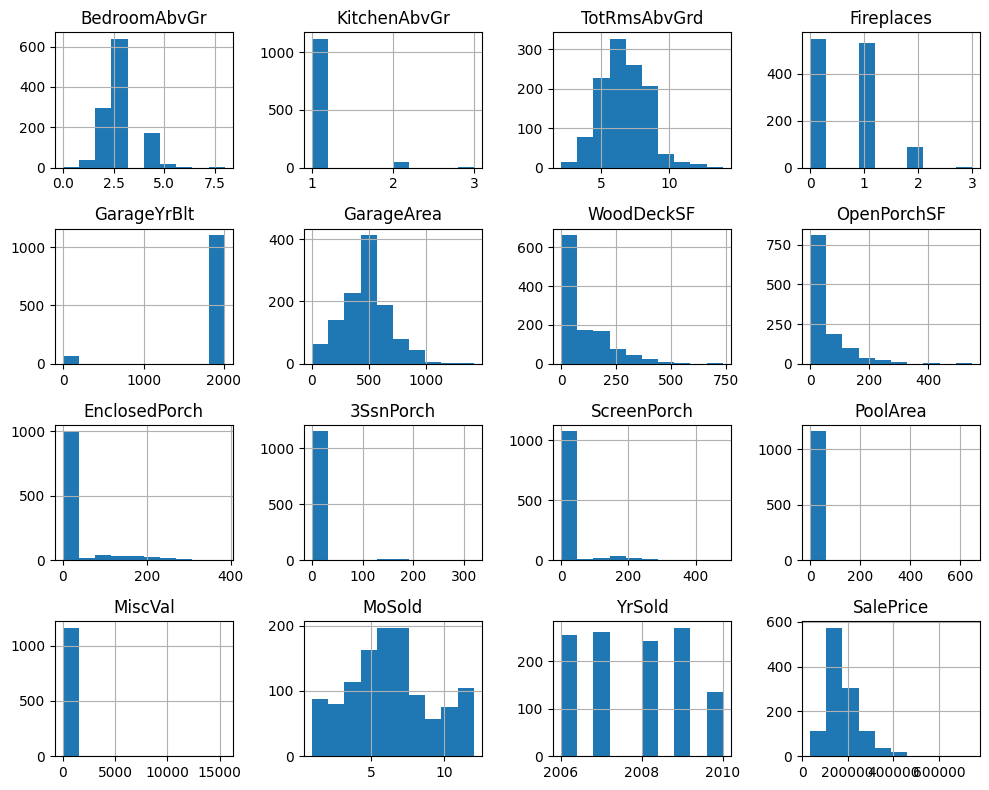

In [17]:
print("Histograms of numerical features:")
df_train.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

**Insight:**
- BedroomAbvGr:
  - Most houses have 2 to 3 bedrooms. Very few houses have more bedrooms.
  - The distribution is highly concentrated, with a few extreme values (houses with 7 bedrooms).
- KitchenAbvGr:

  - Most houses have only 1 kitchen, with a few houses having 2 kitchens.
  - The distribution of kitchen counts shows that the vast majority of houses have a standard one-kitchen structure.
- TotRmsAbvGrd:

  - The number of rooms is close to a normal distribution, with 5 to 7 rooms being the most common.
  - The peak of room counts is at 6 rooms, indicating the typical number of rooms in a household.
- Fireplaces:

  - Most houses have no fireplaces. About half of the houses have one fireplace, and only a few have two or more fireplaces.
- GarageYrBlt:

  - Most houses have garages built in a more recent time period.
  - Some years appear to have missing values(-1).
- GarageArea:

  - The distribution of garage area shows that most houses have a garage area between 500 and 600 square feet.
  - A few houses have larger garage areas (over 1000 square feet), which is rare.
- WoodDeckSF:

  - Most houses have a relatively small wooden deck, with an area between 0 and 250 square feet.
  - Some houses have decks larger than 500 square feet, showing extreme deviations.
- OpenPorchSF:

  - The area of open porches is most commonly between 0 and 100 square feet.
Very few houses have larger open porches (over 400 square feet).
- EnclosedPorch:

  - Most houses have no enclosed porch, and only a few houses have enclosed porches with small areas.
- 3SsnPorch:

  - Most houses do not have three-season porches (porches used in spring, summer, and fall).
  - For houses that do have one, the area is concentrated in a small range.
- ScreenPorch:

  - Most houses have no screened porch. A small number of houses have screened porches, but the areas are small.
- PoolArea:

  - The vast majority of houses do not have a pool. A few houses have pools, but the sizes vary.
- MiscVal:

  - Miscellaneous values show that most houses do not have miscellaneous facilities (value of 0). Some houses have significant miscellaneous values, which are rare cases.
- MoSold:

  - The house sales months are evenly distributed throughout the year, showing no significant seasonal preference.
- YrSold:

  - House sales are concentrated between 2007 and 2010, showing an even distribution of sales over these years.
- SalePrice:

  - The sale price distribution is right-skewed, with most houses priced below $200,000.
  - Higher-priced houses are outliers, showing a large variance in house prices.
